# Otimização de parâmetros em algoritmos de ML usando espaço de estados

# Grupo
Caio Marcos Chaves Viana - 11208217 \\
César Henrique de Araujo Guibo - 11218705 \\
Leonardo Fonseca Pinheiro- 11219241 \\
Maria Fernanda Lucio de Mello - 11320860 \\
Paulo Matana da Rocha - 10892676 \\
Victor Rodrigues Russo - 11218855

## Introdução

A computação tradicional é baseada na criação de um algoritmo que recebe valores de entrada, os processe e gere uma saída. Já o aprendizado de máquina segue a ideia de automatizar essa criação, a partir de uma base de dados com pares de entrada (geralmente referida como X) e saída (chamada y). Assim, tentamos ajustar os parâmetros de um modelo, a fim de minimizar o erro dentro do seu banco, criando a capacidade de generalizá-lo para qualquer entrada. 

Um exemplo desse processo é a classificação onde, a partir de variáveis X, que podem ser discretas ou contínuas, atribuímos uma classe y. Um exemplo de classificação é, dada uma imagem com dígitos escritos a mão, classificar a qual classe tal dígito faz parte. 

Atualmente estes parâmetros de modelos são usualmente calculados por algoritmos numéricos, como o gradiente descendente. Mas a proposta do presente trabalho é aplicar as estratégias de busca vistas em aula para obter estes parâmetros. Ou seja, para cada configuração dos parâmetros temos um estado e então partindo de um estado inicial, vamos buscar uma configuração que obtenha acurácia superior a um valor determinado (estado final). 

## A Regressão Logística

A regressão logística é um algoritmo de classificação que se baseia na ideia de encontrar um hiperplano que separe os dados no espaço. Por exemplo se tivermos apenas duas variáveis de entrada, queremos  encontrar uma reta que vai separar duas classes (geralmente referidas classes 0 e 1) no plano. 

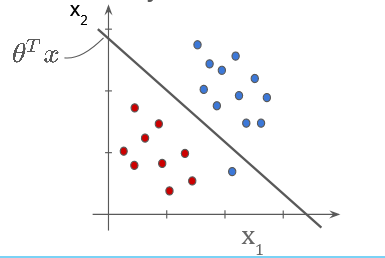

No nosso exemplo, o valor z é dado por:

$$
z = \beta_1X_1 + \beta_2X_2+\beta_3
$$

Assim quando realizamos a regressão, nossa ideia é encontrar os melhores valores de $\beta$ possíveis. 

Mas como podemos ligar esse y com a probabilidade do nosso dado $(X_1,X_2)$  pertencer a classe positiva?


Podemos utilizar a função logística:

$$
y = \dfrac{1}{1+e^{-z}}
$$

Onde y é a probabilidade de $(X_1,X_2)$ pertencer a classe positiva. 
A função logística tranforma o valor z que varia de $(-\infty,+\infty)$ em um valor entre $(0,1)$.

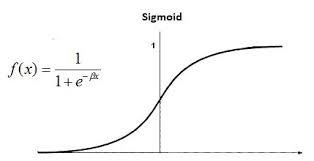

Neste trabalho, iremos usar a regressão logística pela sua simplicidade e funcionamento intuitivo.

## Espaço de Estados

Como dito anteriormente, vamos buscar estes parâmetros por meio de busca em grafo. Mas o que será nosso grafo? 

Nosso grafo será os possíveis valores de $\beta$.

O valores $\beta_1,\beta_2,...\beta_n$ são contínuos, mas nós vamos quantizar eles para que possamos modelar nosso exemplo como um espaço de estados finito.

Por exemplo, se tivermos uma regressão logística com apenas uma varíavel de entrada, teríamos:

$$
z = \beta_1X_1 +\beta_2
$$

Então um exemplo de estado seria $(\beta_1,\beta_2) = (0,0)$. Assim adotando uma quantização de valor $0.1$, este estado tem como vizinho os seguintes estados:

$$
(0.1,0)
$$
$$
(-0.1,0)
$$
$$
(0,0.1)
$$
$$
(0,0.1)
$$

### Função de Transição

Para cada estado $(\alpha,\beta)$, seu vértices adjacentes serão:

$$
(\alpha+\Delta,\beta)
$$
$$
(\alpha-\Delta,\beta)
$$
$$
(\alpha,\beta+\Delta)
$$
$$
(\alpha,\beta-\Delta)
$$


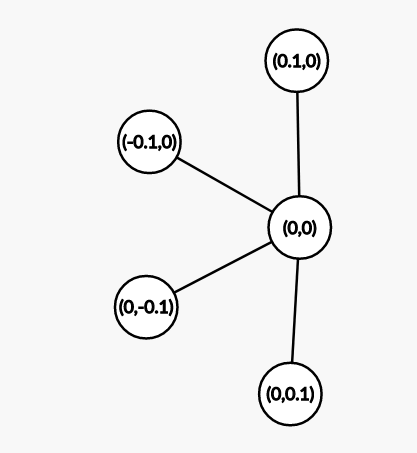

### Estado Inicial

Para nossos testes iremos considerar o estado inicial sempre como a origem do espaço, ou seja, com todos os parâmetros setados para 0. Outras configurações poderiam ser estudadas.

### Estados Finais

Serão considerados estado finais do nosso grafo, aqueles onde a acurácia for acima de certo valor pré-definido. A acurácia é a porcentagem de exemplos que nosso modelo classifica de maneira correta. 

Para encontrarmos estes valores, deixamos o algoritmo rodar dentro de um intervalo bem grande e salvamos a melhor acurácia. 

### Limitações no Espaço de Estados

Como é fácil perceber, os parâmetros podem variar de $(-\infty,+\infty)$ o que nos daria um espaço de estados ilimitado. Para limitar o tempo de execução vamos considerar as buscas em um espaço limitado e caso não haja um ponto que satisfaça a acurácia neste espaço, pegamos o ponto de melhor acurácia. Podemos facilmente deixar sem limites, entretanto caso estejamos pedindo uma acurácia muito alta, corremos o risco desse algoritmo rodar para sempre.

## Motivação

Apesar de parecer ingênuo e pouco eficiente realizar a otimização de parâmetros pelo método descrito quando existem métodos numéricos velozes para tal, podemos motivar tal abordagem pela necessidade da diferenciabilidade da função de custo que estes métodos exigem.

Assim o método abordado baseado em espaço de estados pode fornecer um caminho para treinar modelos considerando uma função de custo não diferenciável. 

Além disso, quando algoritmos como o perceptron foram propostos, sua otimização também era baseado em ideias discretas, assim esta abordagem é um interessante exercício mental que nos permite compreender mais sobre otimização sob uma perspectiva histórica.

## Classificando espécies de pinguim baseado no tamanho da nadadeira

O dataset utilizado para a demonstação do algoritmo foi  o **Penguin dataset** (https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris), o dataset possui dois arquivos o utilizado nesse trabalho é o *penguins_size.csv*.

Esse dataset possui informações sobre três espécies de pinguins encontrados no arquipélago Palmer (Antartica) Adelie, Chinstrap e Gentoo. Nossa intenção é usar as ideias de algoritmos descritas anteriormente para classificar os pinguins como pertencentes ou não à espécie Gentoo, com base no tamanho das nadadeiras.

In [ ]:
#Bibliotecas usadas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from queue import PriorityQueue

Importamos o dataset

In [ ]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Reduzimos o dataset para que contenha apenas as colunas ***species*** e ***flipper_length_mm***

In [ ]:
df = df.drop(['island','culmen_length_mm','culmen_depth_mm','body_mass_g','sex'],axis=1) #drop das outras colunas
df = df.dropna() # drop do NaN
df.head()

,species,flipper_length_mm
0,Adelie,181.0
1,Adelie,186.0
2,Adelie,195.0
4,Adelie,193.0
5,Adelie,190.0


Para possibilitar a utilização dos algoritmos trocamos os dados da coluna ***species*** para 1 quando o penguin é da espécie Gentoo e 0 para as demais.

In [ ]:
df.loc[df['species'] != 'Gentoo','species'] = 0
df.loc[df['species'] == 'Gentoo','species'] = 1
df

,species,flipper_length_mm
0,0,181.0
1,0,186.0
2,0,195.0
4,0,193.0
5,0,190.0
...,...,...
338,1,214.0
340,1,215.0
341,1,222.0
342,1,212.0


Agora dividimos o dataset em dois conjuntos, conjunto de treino e conjunto de teste, além disso também normalizamos os valores de X para o intervalo \[0,1\] para que tenhamos um espaço menor de busca.

In [ ]:
y = df['species']
X = df.drop('species',axis=1)

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.25, shuffle=True,random_state = 42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

Agora vamos a parte dos algoritmos em si.

Aqui criamos a função que gera os estado adjacentes no espaço de busca. Ela recebe como entrada o estado atual, o tamanho do passo e os limites de minimo e máximo. Retorna uma lista de estados adjacentes.

In [ ]:
def adjacencies(current_state, step = 0.1,min = -5, max = 5):
  s = current_state.shape[0]
  adjacencies = []

  for i in range(s):
    aux = current_state.tolist()

    # estados + passo
    aux[i] = aux[i]+step
    if aux[i] <= max:
      # adiciona na lista de saída
      adjacencies.append(np.array(aux))

    aux = current_state.tolist()
      
    # estados - passo 
    aux[i] = aux[i]-step

    if aux[i] >= min:
      # adiciona na lista de saída 
      adjacencies.append(np.array(aux))  
  return adjacencies

adjacencies(np.array([0,0]))

[array([0.1, 0. ]),
 array([-0.1,  0. ]),
 array([0. , 0.1]),
 array([ 0. , -0.1])]

Criamos uma função para calcular a precisão da regressão encontrada.

Recebe como entrada o conjunto de teste, os pesos da regressão e seu valor de viés. Retorna o valor da acurácia.

In [ ]:
def accuracy(X_test, y_test, Weights, bias):

  #calcula as predições 
  y_hat = 1/(1+np.exp(-(X_test @ Weights + bias)))

  #bináriza a saida
  y_hat[ y_hat >= 0.5 ] = 1
  y_hat[ y_hat < 0.5 ] = 0

  #calcula e retorna a acurácia
  return accuracy_score(y_test,y_hat)

accuracy(X_test,y_test,np.array([7]),-4)

0.9883720930232558

### BFS

Para o trabalho deveriamos escoher dois algoritmos de busca em grafos, uma busca cega e uma informada.

O para a busca cega escolhemos o algoritmo de Busca em Largura (BFS). Esse algoritmo foi abordado pois para nosso espaço de busca é mais interessante procurar um os estados finais de maneira simétrica em relação ao ponto inicial, pois queremos que todos os parametros da regressão sejam alterados, caso utilizássemos uma DFS buscaríamos primeiro todos os valores de um único parametro antes que um segundo fosse alterado.

Criamos uma função adaptada de BFS que utiliza o conjunto de treino para verificar se um estado final foi encontrado. O estado final é definido pelos valores que geram uma regressão com acurácia maior que a definida na entrada da função.

A função recebe como entrada o conjunto de treino, o estado inicial, o valor do passo para gerar o estado de busca e a acurácia procurada (define o estado final).

In [ ]:
def bfs( X_train, Y_train, first=([0,0,0,0,0]), step=0.1, acc=0.9):
  # inicializando variaveis
  queue = []
  visited={}
  queue.append(np.array(first))
  count = 0
  best = [0 , first]

  #bfs
  while bool(queue) and count<10**7:
    current = queue.pop(0)
    cur_acc = accuracy(X_train, Y_train, current[:-1], current[-1])
    if(cur_acc > best[0]):
      best[0] = cur_acc
      best[1] = current
    try:
      visited[str(current)] == 1
    except:
      # print(current)
      visited[str(current)] = 1
      if cur_acc >= acc:
        print("N° de estados visitados: %d" % count)
        print("Acurácia atingida: %f" % cur_acc);
        return current
    
      next_states = adjacencies(current, step, min=-15, max=15)
      queue.extend(next_states) 
      count += 1

  print("Número máximo de iterações atingido")
  print("N° de estados visitados: %d" % count)
  print("Acurácia máxima: %f" % best[0])
  return best [1]

Rodando a BFS no conjunto de treino e começando do nó \[0,0\] obtemos o seguinte resultado:

In [ ]:
resp = bfs(X_train,y_train, [0,0], step=0.3, acc=0.96)
resp

N° de estados visitados: 120
Acurácia atingida: 0.972656


array([ 1.5, -0.9])

Para verificar se o estado final encontrado é bom, testamos sua acurácia no conjunto de teste, pois como o algoritmo nunca viu esse conjunto podemos ter a ideia da generalidade da solução.

In [ ]:
accuracy(X_test,y_test,resp[:-1],resp[-1])

0.9883720930232558

### Best First

Para o algoritmo da busca informada, decidimos utilizar o algoritmo BestFirst, pois para o nosso problema não nos preocupamos com o tamanho do caminho, queremos apenas encontrar um estado final da maneira mais rápida possivel. A busca BestFirst propicia isso pois visita primeiro os estados que geram a melhor heuristica (estados mais promissores em uma abordagem gulosa).


Vamos escolher então uma função heurística apropriada para o problema. Essa função deve considerar ligeiras variações na diferença da previsão.
Para isso utilizamos a LogLoss, que compara a saída da função logistica, um numero no intervalo \[0,1\], com o valor real de y(0 ou 1).

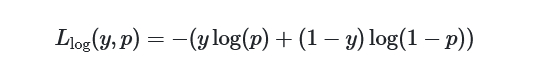

Desse modo, quanto mais próxima a saída da distribuição real, menor será o valor obtido na conta acima. 

In [ ]:
def heuristica(X_test, y_test, Weights, bias):

  y_hat = 1/(1+np.exp(-(X_test @ Weights +bias)))
  
  
  return log_loss(y_test,y_hat)

heuristica(X_test,y_test,np.array([3.5]),-2)

0.380793237593342

In [ ]:
def bestFirst(X_train, y_train, first=([0,0,0,0,0]), step=0.1, acc=0.9):
  visited={str(np.array(first)):1}
  best = [0, first, 10**8]
  queue = PriorityQueue()
  queue.put((10**8,first))
  print(queue)
  count = 0
  while (not queue.empty()) and count<10**5:
    current = queue.get()
    cur_acc = accuracy(X_train, y_train, current[1][:-1], current[1][-1])

    # define melhor estado
    if(cur_acc>=best[0]):
      if(cur_acc==best[0]):
        if(current[0]<best[2]):
          best[1] = current[1]
          best[0] = cur_acc
          best[2] = current[0]
          print("Acc: %f -- Estado: %s" % (best[0], str(best[1])))
      else:
        best[1] = current[1]
        best[0] = cur_acc
        best[2] = current[0]
        print("Acc: %f -- Estado: %s" % (best[0], str(best[1])))

    loss = current[0]
    current = np.array(current[-1])
   
    #verifica se é estado final
    if  cur_acc > acc:
      print("N° de estados visitados: %d" % count)
      print("Loss: %f -- Acc: %f" % (loss, cur_acc))
      return current
    
    #calcula próximos estados
    next_states = adjacencies(current, step, min=-15, max=15)
    for state in next_states:
      try:
        visited[str(state)] == 0
      except:
        visited[str(state)] = 1
        heu = heuristica(X_train, y_train, state[:-1], state[-1])
        queue.put((heu, state.tolist())) 
    count += 1

  print("Número máximo de iterações atingido %d" %count)
  return best[1]

Vamos rodar a BestFirst.

In [ ]:
resp = bestFirst(X_train,y_train,[0,0], step=0.3, acc=0.96)
resp

Acc: 0.367188 -- Estado: [0, 0]
Acc: 0.632812 -- Estado: [0.0, -0.3]
Acc: 0.652344 -- Estado: [0.3, -0.3]
Acc: 0.652344 -- Estado: [0.6, -0.6]
Acc: 0.929688 -- Estado: [0.8999999999999999, -0.6]
Acc: 0.972656 -- Estado: [1.5, -0.8999999999999999]
N° de estados visitados: 8
Loss: 0.542857 -- Acc: 0.972656


array([ 1.5, -0.9])

Rodando, obtemos um resultado aceitável de maneira muito mais rápida do que utilizando a BFS.

## Outros Experimentos

Podemos aplicar o método em outros datasets e conferir o resultado

### Classificando Espécies de flores no Dataset Iris

Este é um dataset clássico com espécies de flor Iris. está disponível para download em https://www.kaggle.com/uciml/iris e o arquivo utilizado aqui é Iris.csv

O que iremos fazer é baseado nas dimensões das flores, realizar uma classificação com regressão logística se a flor é uma Iris-virginica ou não.

In [ ]:
import pandas as pd

iris = pd.read_csv('/content/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#preparando o dataset
iris.loc[iris['Species'] != 'Iris-virginica','Species'] = 0
iris.loc[iris['Species'] == 'Iris-virginica','Species'] = 1

In [ ]:
y = iris['Species']
X = iris.drop('Species',axis=1).drop('Id',axis=1)

In [ ]:
#dividindo e normalizando

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.25, shuffle=True,random_state = 42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
#aplicando a BFS
resp = bfs(X_train,y_train, [0,0,0,0,0], step=0.5, acc=0.96)
resp

N° de estados visitados: 6115
Acurácia atingida: 0.964286


array([-0.5,  0. ,  1. ,  1. , -1. ])

In [ ]:
accuracy(X_test,y_test,resp[:-1],resp[-1])

1.0

In [ ]:
#aplicando a best First
resp = bestFirst(X_train,y_train,[0,0,0,0,0], step=0.3, acc=0.96)
resp

Acc: 0.339286 -- Estado: [0, 0, 0, 0, 0]
Acc: 0.660714 -- Estado: [0.0, 0.0, 0.0, 0.0, -0.3]
Acc: 0.687500 -- Estado: [0.0, 0.0, 0.0, 0.3, -0.3]
Acc: 0.687500 -- Estado: [0.0, 0.0, 0.0, 0.6, -0.6]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 0.8999999999999999, -0.6]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 1.8, -1.2]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 2.6999999999999997, -1.8]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 2.9999999999999996, -2.1]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 3.2999999999999994, -2.1]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 3.599999999999999, -2.4]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 3.899999999999999, -2.6999999999999997]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 4.199999999999999, -2.6999999999999997]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 4.499999999999999, -2.9999999999999996]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 4.799999999999999, -3.2999999999999994]
Acc: 0.946429 -- Estado: [0.0, 0.0, 0.0, 5.099999999999999, -3.2999999999999994]
Acc: 0.94642

array([ 0. , -4.2,  3.3, 12. , -8.4])

In [ ]:
accuracy(X_test,y_test,resp[:-1],resp[-1])

0.9736842105263158

Verificamos novamente que a BestFirst encontra um resultado de maneira muito mais rápida que a BFS. Os estados diferentes se devem pela simplicidade o Iris e seu pequeno número de amostras, mas é interessante notar que mesmo em uma configuração simples, a BFS precisa rodar uma grande quantidade de estados para obter uma boa acurácia

## Conclusão

Podemos ver que o método discutido é válido e encontra boas soluções para a otimização, entretando a BFS se torna rapidamente inviável conforme se aumenta o tamanho do espaço de estados, enquanto a busca heurística fornece uma possibilidade que apresenta bons resultados em bom tempo. 

Também é importante notar que apesar de só a regressão logística ter sido utilizada por simplicidade, o método poderia ser aplicado em qualquer modelo de ML com parâmetros, como uma regressão linear.

## Referências



- https://www.youtube.com/watch?v=BbYV8UfMJSA&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=4
- https://d2l.ai/chapter_linear-networks/softmax-regression.html